In [1]:

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:

file_path = r"C:\Users\User\airports.dat"
air = pd.read_csv(file_path, delimiter=',', header=None)  
print(air.head())


   0                                            1             2   \
0   1                               Goroka Airport        Goroka   
1   2                               Madang Airport        Madang   
2   3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3   4                               Nadzab Airport        Nadzab   
4   5  Port Moresby Jacksons International Airport  Port Moresby   

                 3    4     5         6           7     8   9  10  \
0  Papua New Guinea  GKA  AYGA -6.081690  145.391998  5282  10  U   
1  Papua New Guinea  MAG  AYMD -5.207080  145.789001    20  10  U   
2  Papua New Guinea  HGU  AYMH -5.826790  144.296005  5388  10  U   
3  Papua New Guinea  LAE  AYNZ -6.569803  146.725977   239  10  U   
4  Papua New Guinea  POM  AYPY -9.443380  147.220001   146  10  U   

                     11       12           13  
0  Pacific/Port_Moresby  airport  OurAirports  
1  Pacific/Port_Moresby  airport  OurAirports  
2  Pacific/Port_Moresby  airport

In [3]:
file_path = r"C:\Users\User\routes.dat"
route = pd.read_csv(file_path, delimiter=',', header=None)  
print(route.head())

    0    1    2     3    4     5    6  7    8
0  2B  410  AER  2965  KZN  2990  NaN  0  CR2
1  2B  410  ASF  2966  KZN  2990  NaN  0  CR2
2  2B  410  ASF  2966  MRV  2962  NaN  0  CR2
3  2B  410  CEK  2968  KZN  2990  NaN  0  CR2
4  2B  410  CEK  2968  OVB  4078  NaN  0  CR2


In [ ]:
#Creazione del grafo da dati di aeroporti e rotte

In [4]:
#  i nodi come aeroporti (colonna 4 come codici IATA)
airports = air[[4]]  
airports.columns = ['IATA']
# Definiamo gli archi come le rotte (colonne 2 e 4 come aeroporto di partenza e arrivo)
routes = route[[2, 4]]
routes.columns = ['Source', 'Destination']
g = nx.Graph()
# si aggiungono i nodi (gli aeroporti)
for iata in airports['IATA']:
    g.add_node(iata)

# si aggiungono gli  archi (le rotte)
for index, row in routes.iterrows():
    g.add_edge(row['Source'], row['Destination'])


In [9]:
#Trovare ponti (bridges) e ponti locali (local bridges)

In [5]:
# qui verifica se ci sono ponti nel grafo
has_bridges = nx.has_bridges(g)
print(f"Il grafo ha ponti: {has_bridges}")
all_bridges = list(nx.bridges(g))

num_bridges = len(all_bridges)
print(f"Numero totale di ponti nel grafo: {num_bridges}")

print("Tutti i ponti nel grafo:")
print(all_bridges)


Il grafo ha ponti: True
Numero totale di ponti nel grafo: 817
Tutti i ponti nel grafo:
[('POM', 'BUL'), ('POM', 'CMU'), ('POM', 'MDU'), ('POM', 'WBM'), ('THU', 'NAQ'), ('THU', 'SVR'), ('AEY', 'RKV'), ('EGS', 'RKV'), ('IFJ', 'RKV'), ('YBR', 'YYC'), ('YEV', 'YPC'), ('YEV', 'YUB'), ('YEV', 'ZFM'), ('YFB', 'YXP'), ('YFB', 'YAB'), ('YFB', 'YLC'), ('YFS', 'YZF'), ('YGK', 'YYZ'), ('YLL', 'YYC'), ('YMO', 'YFA'), ('YPR', 'YVR'), ('YQL', 'YYC'), ('YRB', 'YGZ'), ('YRB', 'YAB'), ('YVM', 'YXP'), ('YVP', 'XGR'), ('YVR', 'YPW'), ('YVR', 'YZZ'), ('YVR', 'ZMT'), ('YVR', 'YYF'), ('YVR', 'YZP'), ('YXH', 'YYC'), ('YYZ', 'YZR'), ('YZF', 'YFJ'), ('YZF', 'YLE'), ('YZF', 'YRA'), ('YZF', 'YSG'), ('ALG', 'EBH'), ('ALG', 'ELU'), ('ALG', 'MZW'), ('ALG', 'TEE'), ('ALG', 'TGR'), ('CFK', 'MRS'), ('ORN', 'CBH'), ('AZR', 'BMW'), ('ACC', 'KMS'), ('ACC', 'TML'), ('ACC', 'NYI'), ('ACC', 'TKD'), ('ABV', 'GMO'), ('ABV', 'IBA'), ('ABV', 'ILR'), ('ABV', 'SKO'), ('ABV', 'YOL'), ('JOS', 'LOS'), ('KAD', 'LOS'), ('LOS', 'QUO'), 

In [11]:
#Trovare tutti i ponti locali e calcolare la distanza tra i nodi (span)

In [ ]:
#Un ponte locale è un collegamento (arco) tra due nodi che, se rimosso, non disconnetterebbe l'intero grafo

In [6]:
# Trovare i ponti locali e calcolare lo span
local_bridges = list(nx.local_bridges(g, with_span=True))
print("Tutti i ponti locali e i rispettivi span:")
print(local_bridges)


Tutti i ponti locali e i rispettivi span:
[('POM', 'BUL', inf), ('POM', 'CMU', inf), ('POM', 'MDU', inf), ('POM', 'WBM', inf), ('GOH', 'KEF', 3), ('SFJ', 'CPH', 3), ('THU', 'NAQ', inf), ('THU', 'SVR', inf), ('AEY', 'RKV', inf), ('EGS', 'RKV', inf), ('IFJ', 'RKV', inf), ('YBL', 'ZEL', 3), ('YBR', 'YYC', inf), ('YCL', 'YHZ', 3), ('YCL', 'YWK', 3), ('YCO', 'YHI', 4), ('YCY', 'YFB', 3), ('YCY', 'YIO', 3), ('YZS', 'YTE', 3), ('YDQ', 'YVR', 3), ('YDQ', 'YYE', 3), ('YEV', 'YPC', inf), ('YEV', 'YUB', inf), ('YEV', 'ZFM', inf), ('YFB', 'YOW', 3), ('YFB', 'YRT', 3), ('YFB', 'YTE', 3), ('YFB', 'YXP', inf), ('YFB', 'YAB', inf), ('YFB', 'YLC', inf), ('YFB', 'YVP', 3), ('YFS', 'YZF', inf), ('YGK', 'YYZ', inf), ('YGL', 'YPX', 3), ('YHD', 'YQK', 3), ('YHU', 'YVO', 3), ('YIO', 'YGT', 3), ('YKL', 'YVP', 3), ('YLL', 'YYC', inf), ('YMM', 'YPY', 3), ('YMO', 'YFA', inf), ('YMO', 'YKQ', 5), ('YMO', 'YTS', 5), ('YPR', 'YVR', inf), ('YPY', 'YSM', 3), ('YQG', 'YTZ', 3), ('YQK', 'YAG', 3), ('YQK', 'YWG', 3), ('Y

In [7]:
local_bridges = list(nx.local_bridges(g, with_span=True))
total_local_bridges = len(local_bridges)
print(f"Numero totale di local bridges: {total_local_bridges}")


Numero totale di local bridges: 1284


In [ ]:
#inf: Significa che, se l'arco tra i due nodi viene rimosso, non esiste alcun altro cammino che collega quei due nodi. Questo rende l'arco
#molto simile a un ponte globale (bridge), perché i due nodi diventerebbero completamente scollegati.

In [8]:
local_bridges = list(nx.local_bridges(g, with_span=True))
# Filtrare le rotte con span 'inf'
routes_with_inf_span = [bridge for bridge in local_bridges if bridge[2] == float('inf')]
count_inf_span = len(routes_with_inf_span)
print(f"Numero di rotte con span infinito: {count_inf_span}")


Numero di rotte con span infinito: 817


In [13]:
#Calcolare la sovrapposizione del vicinato (Neighborhood Overlap)
#Per misurare la forza del legame tra i nodi nel grafo, possiamo calcolare la sovrapposizione del vicinato per ciascuna coppia di nodi.

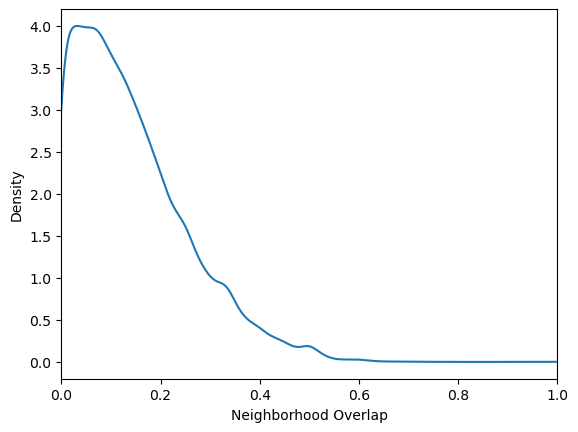

In [14]:
def node_overlap(g):
    for u, v in g.edges():
        n_u = set(g.neighbors(u)) 
        n_v = set(g.neighbors(v))  
        overlap = len(n_u & n_v) / len(n_u | n_v) if len(n_u | n_v) > 0 else 0  # Sovrapposizione del vicinato
        g[u][v]['overlap'] = overlap
    return g

g = node_overlap(g)

# Tracciare la KDE della sovrapposizione del vicinato
weights = [e[-1]['overlap'] for e in g.edges(data=True)]
pd.DataFrame(weights)[0].plot.kde()
plt.xlabel("Neighborhood Overlap")
plt.xlim(0, 1)
plt.show()


In [ ]:
#TEORIA
#Neighborhood Overlap misura la proporzione di vicini comuni tra due nodi connessi da un arco, rispetto ai vicini
#totali di entrambi i nodi. Indica quanto una coppia di nodi è "immersa" nella stessa comunità:
#Valore vicino a 0: Pochi o nessun vicino comune, il che implica che i due nodi sono più isolati rispetto al resto della rete.
#Valore vicino a 1: Un alto numero di vicini comuni, il che implica che i due nodi sono fortemente connessi all'interno della stessa comunità o gruppo.

In [ ]:
#interpretazione:
#C'è un grande numero di collegamenti nel grafo con un basso valore di sovrapposizione 
#ta 0 e 1. Questo significa che molte connessioni tra i nodi sono relativamente isolate, con pochi o nessun vicino comune tra i nodi collegati.
#abbiamo rete  formata da molti collegamenti con poca sovrapposizione tra i vicini, cioè una struttura abbastanza dispersa o frammentata.

In [ ]:
#Generare reti casuali e scalabili, calcolare resilienza e attacchi mirati

In [15]:
#Generare le reti casuali e scalabili

In [9]:
# Generare reti casuali e scalabili
er = nx.erdos_renyi_graph(1000, 0.001)
ba = nx.barabasi_albert_graph(1000, 2)


In [17]:
#Calcolare la resilienza ( stima la robustezza della rete considerando il grado medio dei nodi (ossia, il numero medio di connessioni che ogni nodo ha).

In [10]:
# Calcolare il grado dei nodi
er_degs = list(dict(er.degree()).values())
ba_degs = list(dict(ba.degree()).values())

# Definire la soglia di Molloy-Reed
def molloy_reed(degrees):
    return (np.mean(degrees) * (np.mean(degrees) + 1)) / np.mean(degrees)

def breakdown_threshold(degrees): #misura la resilienza della rete contro la perdita di nodi. È il livello critico oltre il quale la rimozione di nodi dalla rete provoca un collasso significativo della sua connettività. Un valore più alto indica che la 
    #rete è più resistente alla rimozione di nodi, mentre un valore più basso indica che la rete è più vulnerabile.
    K = molloy_reed(degrees)
    return 1 - (1 / (K - 1))

print("Random Network Molloy-Reed:", molloy_reed(er_degs))
print("Random Network Breakdown Threshold:", breakdown_threshold(er_degs))

print("Scale-Free Network Molloy-Reed:", molloy_reed(ba_degs))
print("Scale-Free Network Breakdown Threshold:", breakdown_threshold(ba_degs))


Random Network Molloy-Reed: 2.064
Random Network Breakdown Threshold: 0.06015037593984962
Scale-Free Network Molloy-Reed: 4.992
Scale-Free Network Breakdown Threshold: 0.7494989979959921


In [19]:
# Attacchi casuali e mirati

In [20]:
#Simulare attacchi casuali e mirati

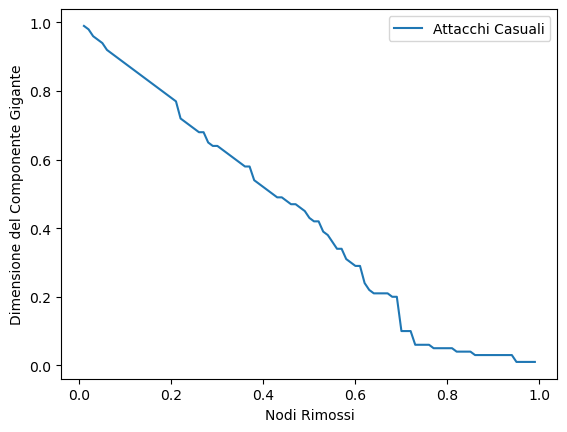

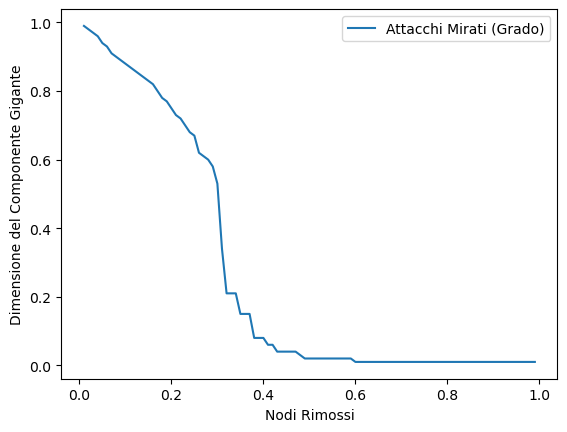

In [15]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


def random_node(g):
    return [np.random.choice(list(g.nodes()))]


def get_sorted_nodes(g, score, reverse=True):
    nodes = score(g)  
    if isinstance(nodes, dict):
        nodes = [(k, v) for k, v in nodes.items()]
    
    srt = sorted(nodes, key=lambda k: k[1], reverse=reverse)
    return [x[0] for x in srt]

# Funzione per smantlllare il grafo
def dismantle(g, function, **args):
    total_nodes = g.number_of_nodes()
    removed_nodes = []
    components = []
    while len(g.nodes()) > 1:
        n = function(g, **args)[0]
        g.remove_node(n)
        removed_nodes.append((len(removed_nodes) + 1) / total_nodes)
        comps = list(nx.connected_components(g))
        g_size = max([len(c) for c in comps]) / total_nodes if len(comps) > 0 else 0
        components.append(g_size)
    return removed_nodes, components

# Creazione del grafo per l'esimpio
g = nx.erdos_renyi_graph(100, 0.05)

# Smantel con attacchi casuali
h = g.copy()
rn, comps = dismantle(h, random_node)
plt.plot(rn, comps, label="Attacchi Casuali")
plt.xlabel("Nodi Rimossi")
plt.ylabel("Dimensione del Componente Gigante")
plt.legend()
plt.show()

# Smantell con attacchi mirati ai nodi con maggiore grado
h = g.copy()
rn, comps = dismantle(h, get_sorted_nodes, score=lambda g: dict(g.degree()))
plt.plot(rn, comps, label="Attacchi Mirati (Grado)")
plt.xlabel("Nodi Rimossi")
plt.ylabel("Dimensione del Componente Gigante")
plt.legend()
plt.show()


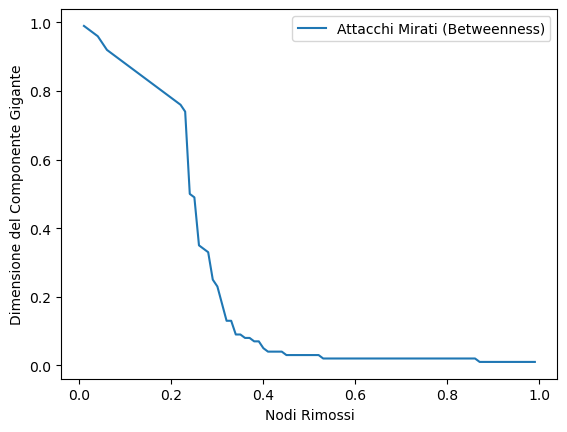

In [18]:
h = g.copy()
rn, comps = dismantle(h, get_sorted_nodes, score=nx.betweenness_centrality)
plt.plot(rn, comps, label="Attacchi Mirati (Betweenness)")
plt.xlabel("Nodi Rimossi")
plt.ylabel("Dimensione del Componente Gigante")
plt.legend()
plt.show()


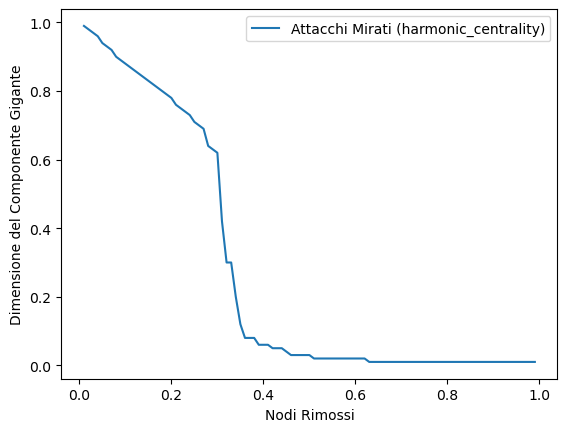

In [19]:
h = g.copy()
rn, comps = dismantle(h, get_sorted_nodes, score=nx.harmonic_centrality)
plt.plot(rn, comps, label="Attacchi Mirati (harmonic_centrality)")
plt.xlabel("Nodi Rimossi")
plt.ylabel("Dimensione del Componente Gigante")
plt.legend()
plt.show()